In [1]:
import spacy
from sklearn.model_selection import train_test_split

In [2]:
# Make sure that the English model is downloaded
if not spacy.util.is_package("en_core_web_sm"):
    spacy.cli.download("en_core_web_sm")
    
# Load the English model
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 44.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
# Create a list of all vocabularies
spacy_vocab = list(nlp.vocab.strings)

In [4]:
# Print the number of vocabularies
print("Number of vocabularies:", len(spacy_vocab))

Number of vocabularies: 84780


In [5]:
# What is the 50000th vocabulary?
print("50000th vocabulary:", spacy_vocab[50000])

50000th vocabulary: gavin


### Let's build a vocabulary by ourselves

In [6]:
import numpy as np
import pandas as pd
from collections import Counter
import re

In [7]:
# Read the data
df = pd.read_excel('Data/reviews 1.xlsx')

In [8]:
df.head()

,rating,review
0,negative,terrible place to work for i just heard a stor...
1,negative,"hours , minutes total time for an extremely s..."
2,negative,my less than stellar review is for service . w...
3,negative,i m granting one star because there s no way t...
4,negative,the food here is mediocre at best . i went aft...


In [9]:
df.tail()

,rating,review
55995,positive,"great food . wonderful , friendly service . i ..."
55996,positive,charlotte should be the new standard for moder...
55997,positive,get the encore sandwich ! ! make sure to get i...
55998,positive,i m a pretty big ice cream gelato fan . pretty...
55999,positive,where else can you find all the parts and piec...


In [10]:
def add_token(vocab, token):
    """
    Add a token to the vocab. Check if the token is already in the vocab, if not, add it to the vocab.
    
    Args:
        vocab (dict): A dictionary of vocabularies.
        token (str): A token to be added to the vocab.
        
    Returns:
        int: The index of the token in the vocab.
    """
    
    if token not in vocab['word2idx']:
        vocab['word2idx'][token] = vocab['count']
        vocab['idx2word'][vocab['count']] = token
        vocab['count'] += 1
        return vocab['count'] - 1
    else:
        return vocab['word2idx'][token]

In [11]:
def add_tokens(vocab, tokens):
    """
    Add a list of tokens to the vocab. Check if the token is already in the vocab, if not, add it to the vocab.
    
    Args:
        vocab (dict): A dictionary of vocabularies.
        tokens (list): A list of tokens to be added to the vocab.
        
    Returns:
        list: A list of indices of the tokens in the vocab.
    """
    indices = []
    for token in tokens:
        index = add_token(vocab, token)
        indices.append(index)
    return indices

In [12]:
def initialize_vocabulary():
    """
    Initialize the vocabulary with the following tokens:
    <UNK>: Unknown token
    <PAD>: Padding token
    <EOS>: End of sentence token

    There are two different dictionaries: word2idx and idx2word
    
    Args:
        None
        
    Returns:
        vocab (dict): A dictionary of vocabularies.
    """
    
    # Define the vocab
    vocab = {}

    # Define the special tokens
    special_tokens = ['<UNK>', '<PAD>', '<EOS>']

    # Define the word2idx dictionary
    vocab['word2idx'] = {}

    # Define the idx2word dictionary
    vocab['idx2word'] = {}

    # Define the count
    vocab['count'] = 0

    # Add the special tokens to the vocab
    for token in special_tokens:
        add_token(vocab, token)
        
    return vocab

In [13]:
def lookup_token(vocab, token):
    """
    Lookup a token in the vocab.
    
    Args:
        vocab (dict): A dictionary of vocabularies.
        token (str): A token to be looked up.
        
    Returns:
        int: The index of the token in the vocab, or the index of the <UNK> token if the token is not in the vocab.
    """
    
    return vocab['word2idx'].get(token, vocab['word2idx']['<UNK>'])

In [14]:
def lookup_index(vocab, index):
    """
    Lookup an index in the vocab.
    
    Args:
        vocab (dict): A dictionary of vocabularies.
        index (int): An index to be looked up.
        
    Returns:
        str: The token of the index in the vocab, or <UNK> if the index is not in the vocab.
    """
    
    return vocab['idx2word'].get(index, '<UNK>')

In [15]:
def vocabulary_from_data(data, column, cutoff=25):
    """
    Build the vocab from a dataframe.
    
    Args:
        data: dataframe
        column: the column that contains the text
        cutoff: the minimum frequency of the token to be added to the vocab
        
    Returns:
        vocab: a dictionary of vocabularies
    """
    # Initialize the vocab
    vocab = initialize_vocabulary()

    # Loop through the data and count the frequency of each token
    word_counter = Counter()
    for text in data[column]:
        # TODO: use spacy to tokenize the text
        tokens = re.split('\W+', text)
        word_counter.update(tokens)

    # Add the token to the vocab if the frequency is greater than cutoff
    for word, count in word_counter.items():
        if count > cutoff:
            add_token(vocab, word)
            
    return vocab

### Let's build the vocab

In [17]:
vocab = vocabulary_from_data(df, 'review')

In [18]:
# Loop up word "the"
lookup_token(vocab, 'the')

40

In [19]:
# Loop up the index 40
lookup_index(vocab, 40)

'the'

In [20]:
# Loop up some unknown word
lookup_token(vocab, 'unknown_word')

0

In [21]:
# Loop up the index 0
lookup_index(vocab, 0)

'<UNK>'

### Onehot encode
One-hot encoding is a technique used to represent categorical data as numerical data. In this technique, each category is represented as a binary vector where all elements are zero except for the element corresponding to the category, which is set to one. This allows categorical data to be used in machine learning algorithms that require numerical input. The `one_hot_encoding` function defined in the code snippet takes an index and a size as input and returns a one-hot encoded vector of the specified size with the element at the specified index set to one.

In [22]:
# Define a one-hot encoding function
def one_hot_encoding(index, size):
    """
    One-hot encoding for a given index and vocab size.
    """
    encoding = np.zeros(size)
    encoding[index] = 1
    return encoding

In [24]:
N = vocab['count']
token = 'the'
one_hot_vector = one_hot_encoding(lookup_token(vocab, token), N)

In [25]:
print(N)

8948


In [26]:
# Zoom in to see the one-hot vector with first 80 elements
one_hot_vector[0:80]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Encoding documents

The text data in Yelp reviews is encoded using one-hot encoding. Each word in the reviews is represented as a feature, and a binary vector is created for each review where the element corresponding to the presence of the word in the review is set to one. This results in a sparse matrix where most of the elements are zero. The resulting matrix can be used as input to machine learning algorithms for tasks such as sentiment analysis and topic modeling.

In [28]:
def encode_document(vocab, doc_tokens, N):
    """
    Encode a document or a sentence. Return a sparse matrix, where each row is a one-hot vector for a token.

    Args:
        vocab (dict): A dictionary of vocabularies.
        doc_tokens (list): A list of tokens in the document.
        N (int): The size of the vocab.
        
    Returns:
        sparse_matrix (numpy array): A sparse matrix, where each row is a one-hot vector for a token.
    """
    # Initialize the sparse matrix
    sparse_matrix = np.zeros((len(doc_tokens), N))

    # Loop through the tokens and one-hot encode each token, using the one_hot_encoding function
    for i, token in enumerate(doc_tokens):
        sparse_matrix[i, :] = one_hot_encoding(lookup_token(vocab, token), N)

    return sparse_matrix

In [29]:
# Let's test with the first review
first_review = df['review'][0]
first_review_tokens = re.split('\W+', first_review)
first_review_matrix = encode_document(vocab, first_review_tokens, N)
print(f'The shape of the sparse matrix is {first_review_matrix.shape}')

The shape of the sparse matrix is (102, 8948)


Note: the number of rows corresponds to the number of tokens, and the number of columns corresponds to the number of unique words in the vocabulary.

In [30]:
def encode_dataset(vocab, data, column, N):
    """
    Encode the whole dataset. Return an array of sparse matrices, where each row is the mean of the one-hot vectors for a document.

    Args:
        vocab (dict): A dictionary of vocabularies.
        data: dataframe
        column: the column that contains the text
        N (int): The size of the vocab.
        
    Returns:
        sparse_matrix_array (numpy array): An array of sparse matrices, where each row is the mean of the one-hot vectors for a document.
    """
    # Initialize the list of sparse matrices
    sparse_matrix_array = np.zeros((len(data), N))

    # Loop through the data and encode each document
    for i, text in enumerate(data[column]):
        # Split the document into tokens
        doc_tokens = re.split('\W+', text)

        # Encode the document
        sparse_matrix = encode_document(vocab, doc_tokens, N)

        # The memory is limited, so we will reduce the matrix to one column, by calculating the mean
        sparse_matrix_array[i, :] = np.mean(sparse_matrix, axis=0)

    return sparse_matrix_array

In [31]:
# First, we split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(df[['review']], df['rating'], test_size=0.3, random_state=42)

In [32]:
# Then we encode the training and validation sets
X_train_encoded = encode_dataset(vocab, X_train, 'review', N)
X_val_encoded = encode_dataset(vocab, X_val, 'review', N)

In [33]:
# Print the shape of the encoded training and validation sets
print(f'The shape of the encoded training set is {X_train_encoded.shape}')
print(f'The shape of the encoded validation set is {X_val_encoded.shape}')

The shape of the encoded training set is (39200, 8948)
The shape of the encoded validation set is (16800, 8948)


In [35]:
# Change 'negative' to 0 and 'positive' to 1
y_train = y_train.map({'negative': 0, 'positive': 1})
y_val = y_val.map({'negative': 0, 'positive': 1})

In [36]:
# Print 10 samples of the encoded training labels
y_train.sample(10)

29423    1
54305    1
25902    0
36299    1
28911    1
36118    1
8963     0
23195    0
14694    0
40554    1
Name: rating, dtype: int64

In [37]:
# Count the unique values in the training labels
Counter(y_train)

Counter({1: 19603, 0: 19597})

### Use Logistic Regression to predict

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [47]:
# Initialize the model
model = LogisticRegression()

In [48]:
# Fit the model
model.fit(X_train_encoded, y_train)

In [ ]:
# Make predictions
y_pred = model.predict(X_val_encoded)

In [ ]:
# Evaluate the model
print(f'The accuracy of the Logistic Regression model on the testing set: {accuracy_score(y_val, y_pred)}')
print(f'The accuracy of the Logistic Regression model on the training set: {accuracy_score(y_train, model.predict(X_train_encoded))}')

The accuracy of the Logistic Regression model on the testing set: 0.8203571428571429
The accuracy of the Logistic Regression model on the training set: 0.8152551020408163


<Axes: >

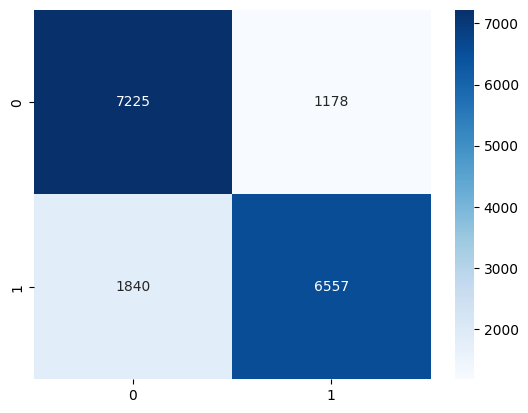

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')